<a href="https://colab.research.google.com/github/RifaldiAchmad/dicoding_task_2/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Rifaldi_Achmad_Faisal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [303]:
!git clone https://github.com/RifaldiAchmad/dicoding_task_2.git

fatal: destination path 'dicoding_task_2' already exists and is not an empty directory.


In [304]:
initialData = pd.read_csv('/content/dicoding_task_2/dataset/bank_transactions_data_2.csv')
initialData

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [305]:
data = initialData.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'])
data

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,251.54,2023-03-22 17:36:48,Debit,Tucson,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,28.63,2023-08-21 17:08:50,Debit,San Diego,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,185.97,2023-02-24 16:24:46,Debit,Denver,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


Membuang beberapa fitur identitas bertipe object yang terlalu banyak variasinya

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [306]:
# Convert 'TransactionDate' and 'PreviousTransactionDate' to datetime objects
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'])

# Calculate the difference between TransactionDate and PreviousTransactionDate
data['DateDifference (Days)'] = abs(data['TransactionDate'] - data['PreviousTransactionDate']).dt.days
initialData['DateDifference (Days)'] = abs(data['TransactionDate'] - data['PreviousTransactionDate']).dt.days
data

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,DateDifference (Days)
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,572
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,495
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,482
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,548
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,384
...,...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29,557
2508,251.54,2023-03-22 17:36:48,Debit,Tucson,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42,592
2509,28.63,2023-08-21 17:08:50,Debit,San Diego,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39,440
2510,185.97,2023-02-24 16:24:46,Debit,Denver,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22,618


Terlebih dahulu convert tipe object pada fitur waktu menjadi format *datetime64*, kemudian membuat fitur baru yaitu *DateDifference (Days)* yang merupakan selisih antara transaksi terbaru dengan transaksi sebelumnya dalam satuan hari.

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2512 non-null   float64       
 1   TransactionDate          2512 non-null   datetime64[ns]
 2   TransactionType          2512 non-null   object        
 3   Location                 2512 non-null   object        
 4   Channel                  2512 non-null   object        
 5   CustomerAge              2512 non-null   int64         
 6   CustomerOccupation       2512 non-null   object        
 7   TransactionDuration      2512 non-null   int64         
 8   LoginAttempts            2512 non-null   int64         
 9   AccountBalance           2512 non-null   float64       
 10  PreviousTransactionDate  2512 non-null   datetime64[ns]
 11  DateDifference (Days)    2512 non-null   int64         
dtypes: datetime64[ns](2), float64(2), 

* Semua data full tidak terdapat missing value
* Tipe data semua fitur sudah tepat

In [308]:
data.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,DateDifference (Days)
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000,2512,2512.000000
mean,297.593778,2023-07-05 20:32:10.826433024,44.673965,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024,486.857882
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23,307.000000
25%,81.885000,2023-04-03 16:22:05.750000128,27.000000,63.000000,1.000000,1504.370000,2024-11-04 08:07:53,394.000000
50%,211.140000,2023-07-07 17:49:43.500000,45.000000,112.500000,1.000000,4735.510000,2024-11-04 08:09:22,485.000000
75%,414.527500,2023-10-06 18:40:53.500000,59.000000,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872,580.000000
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23,671.000000
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499,NaN,106.378910


In [309]:
data.duplicated().sum()

np.int64(0)

Tidak terdapat data yang terduplikat

In [310]:
# Aggregate data per month
monthly_data = data.groupby(pd.Grouper(key='TransactionDate', freq='M')).agg({
    'TransactionAmount': 'sum',
    'TransactionDuration': 'mean',
    'LoginAttempts': 'mean'
}).reset_index()

<ipython-input-310-c68c7e2ebbeb>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.groupby(pd.Grouper(key='TransactionDate', freq='M')).agg({


In [311]:
# Sort the DataFrame by 'TransactionDate' in ascending order
sorted_data = data.sort_values(by='TransactionDate')

# Get only the 'TransactionDate' column
transaction_dates = sorted_data['TransactionDate']
transaction_dates

,TransactionDate
1062,2023-01-02 16:00:06
1368,2023-01-02 16:01:14
1622,2023-01-02 16:01:26
982,2023-01-02 16:06:29
876,2023-01-02 16:07:17
...,...
871,2024-01-01 16:53:32
2044,2024-01-01 17:16:23
2504,2024-01-01 17:21:56
1260,2024-01-01 17:37:04


Data diambil selama satu tahun dari tanggal 2023-01-02 sampai 2024-01-01

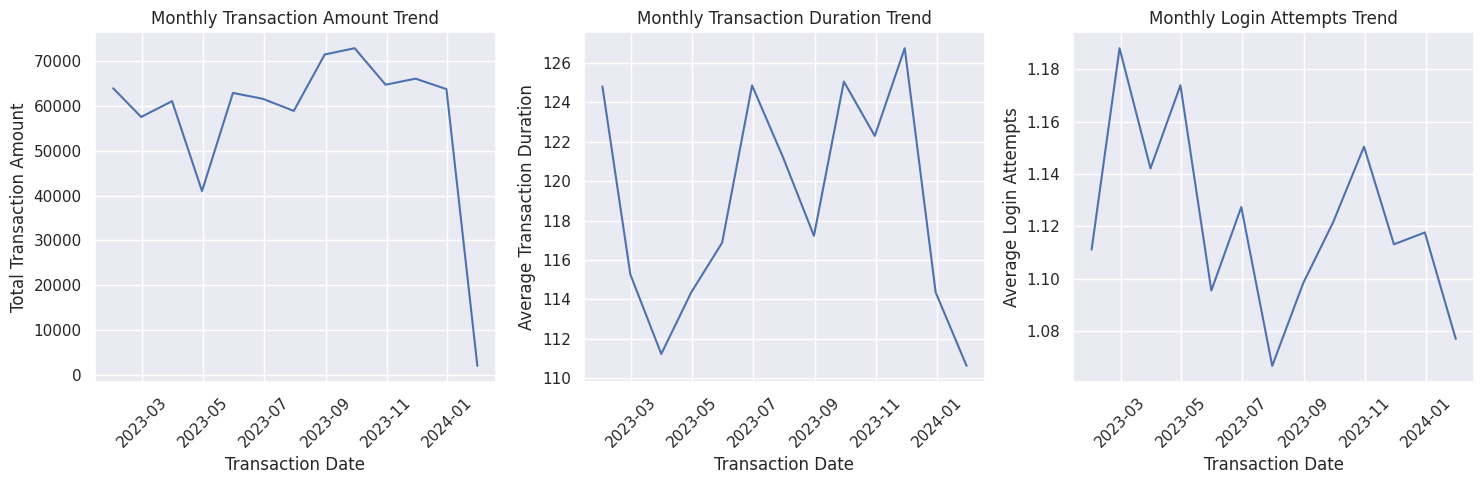

In [312]:
# Visualize trends
plt.figure(figsize=(15, 5))

# TransactionAmount trend
plt.subplot(1, 3, 1)
sns.lineplot(x='TransactionDate', y='TransactionAmount', data=monthly_data)
plt.title('Monthly Transaction Amount Trend')
plt.xlabel('Transaction Date')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)

# TransactionDuration trend
plt.subplot(1, 3, 2)
sns.lineplot(x='TransactionDate', y='TransactionDuration', data=monthly_data)
plt.title('Monthly Transaction Duration Trend')
plt.xlabel('Transaction Date')
plt.ylabel('Average Transaction Duration')
plt.xticks(rotation=45)


# LoginAttempts trend
plt.subplot(1, 3, 3)
sns.lineplot(x='TransactionDate', y='LoginAttempts', data=monthly_data)
plt.title('Monthly Login Attempts Trend')
plt.xlabel('Transaction Date')
plt.ylabel('Average Login Attempts')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

* Terjadi penurunan jumlah transaksi pada bulan Mei 2023
* Rata-rata durasi transaksi berbeda-beda tiap bulannya
* Percobaan login rata-rata mengalami lonjakan di bulan Maret 2023 dan menurun seiring waktu, kemudian mengalami kenaikan lagi di bulan November 2023

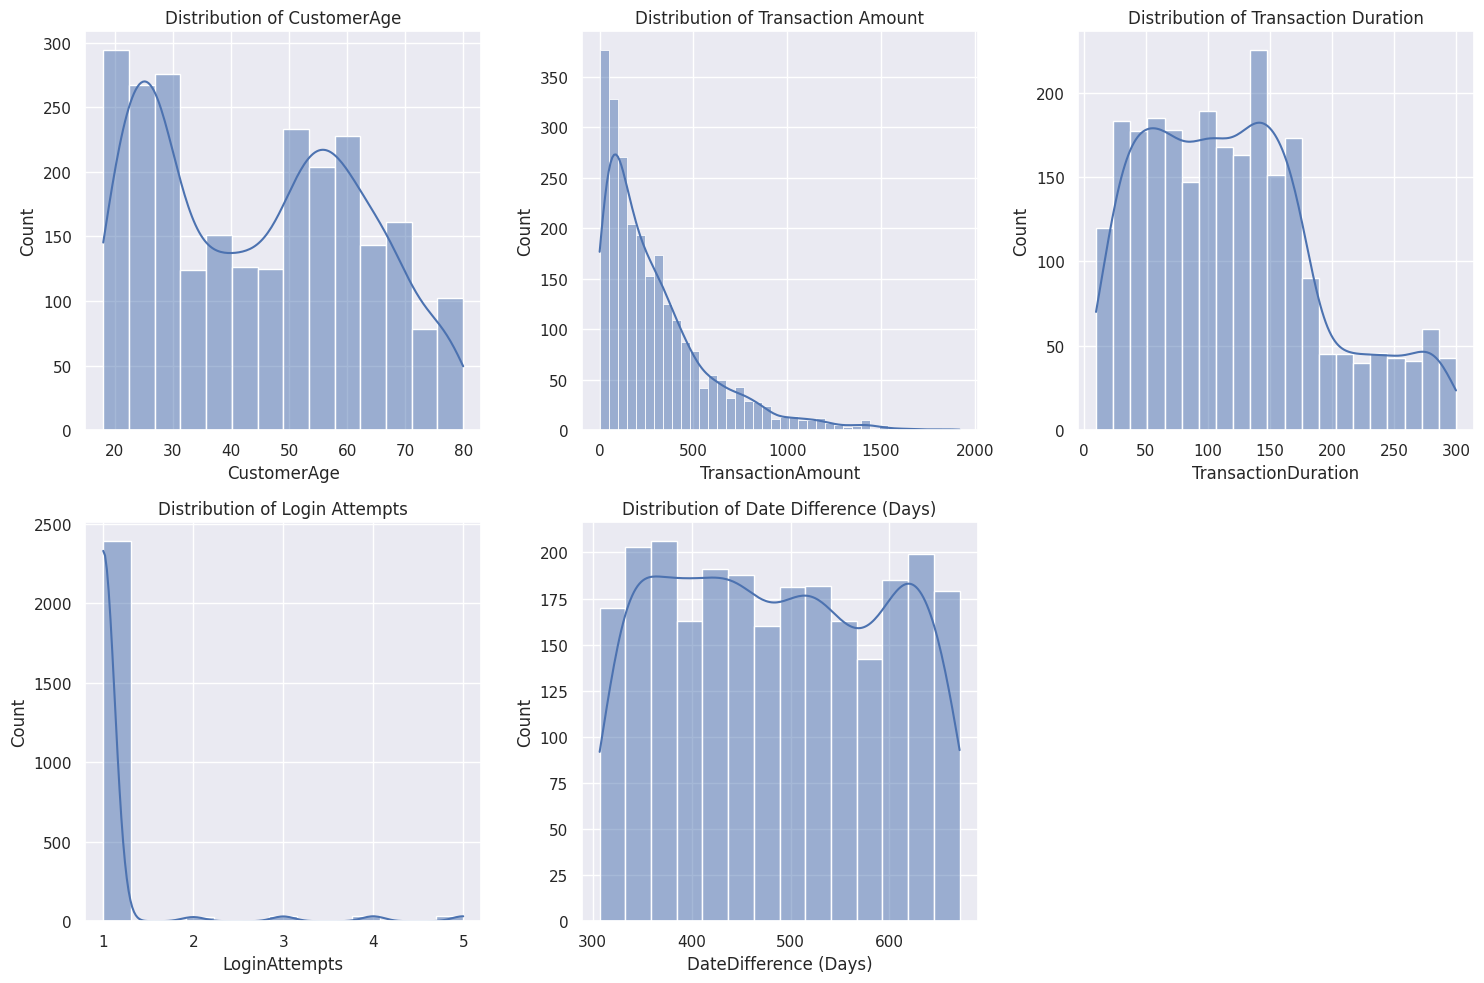

In [313]:
plt.figure(figsize=(15, 10))

# Distribution of CustomerAge
plt.subplot(2, 3, 1)
sns.histplot(data['CustomerAge'], kde=True)
plt.title('Distribution of CustomerAge')

# Distribution of Transaction Amount
plt.subplot(2, 3, 2)
sns.histplot(data['TransactionAmount'], kde=True)
plt.title('Distribution of Transaction Amount')

# Distribution of Transaction Duration
plt.subplot(2, 3, 3)
sns.histplot(data['TransactionDuration'], kde=True)
plt.title('Distribution of Transaction Duration')

# Distribution of Login Attempts
plt.subplot(2, 3, 4)
sns.histplot(data['LoginAttempts'], kde=True)
plt.title('Distribution of Login Attempts')

# Distribution of Date Difference (Days)
plt.subplot(2, 3, 5)
sns.histplot(data['DateDifference (Days)'], kde=True)
plt.title('Distribution of Date Difference (Days)')

plt.tight_layout()
plt.show()

Hampir semua fitur kategorik pada data terlihat memiliki distribusi yang skewed ke kanan, artinya sebagian besar data ada pada nilai yang lebih kecil

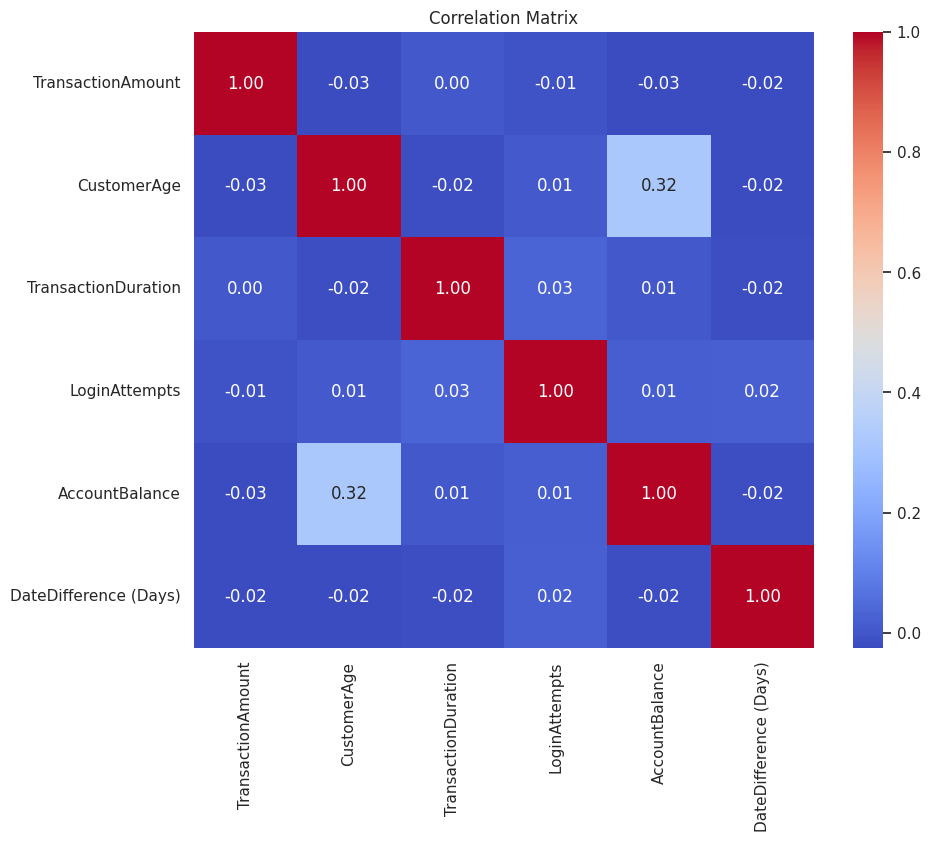

In [314]:
# Calculate the correlation matrix
correlation_matrix = data[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'DateDifference (Days)']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Terlihat bahwa tiap fitur tidak memiliki korelasi yang signifikan, bahkan hampir semua fitur tidak terkait sama sekali atau nilai korelasi hampir mendekati 0

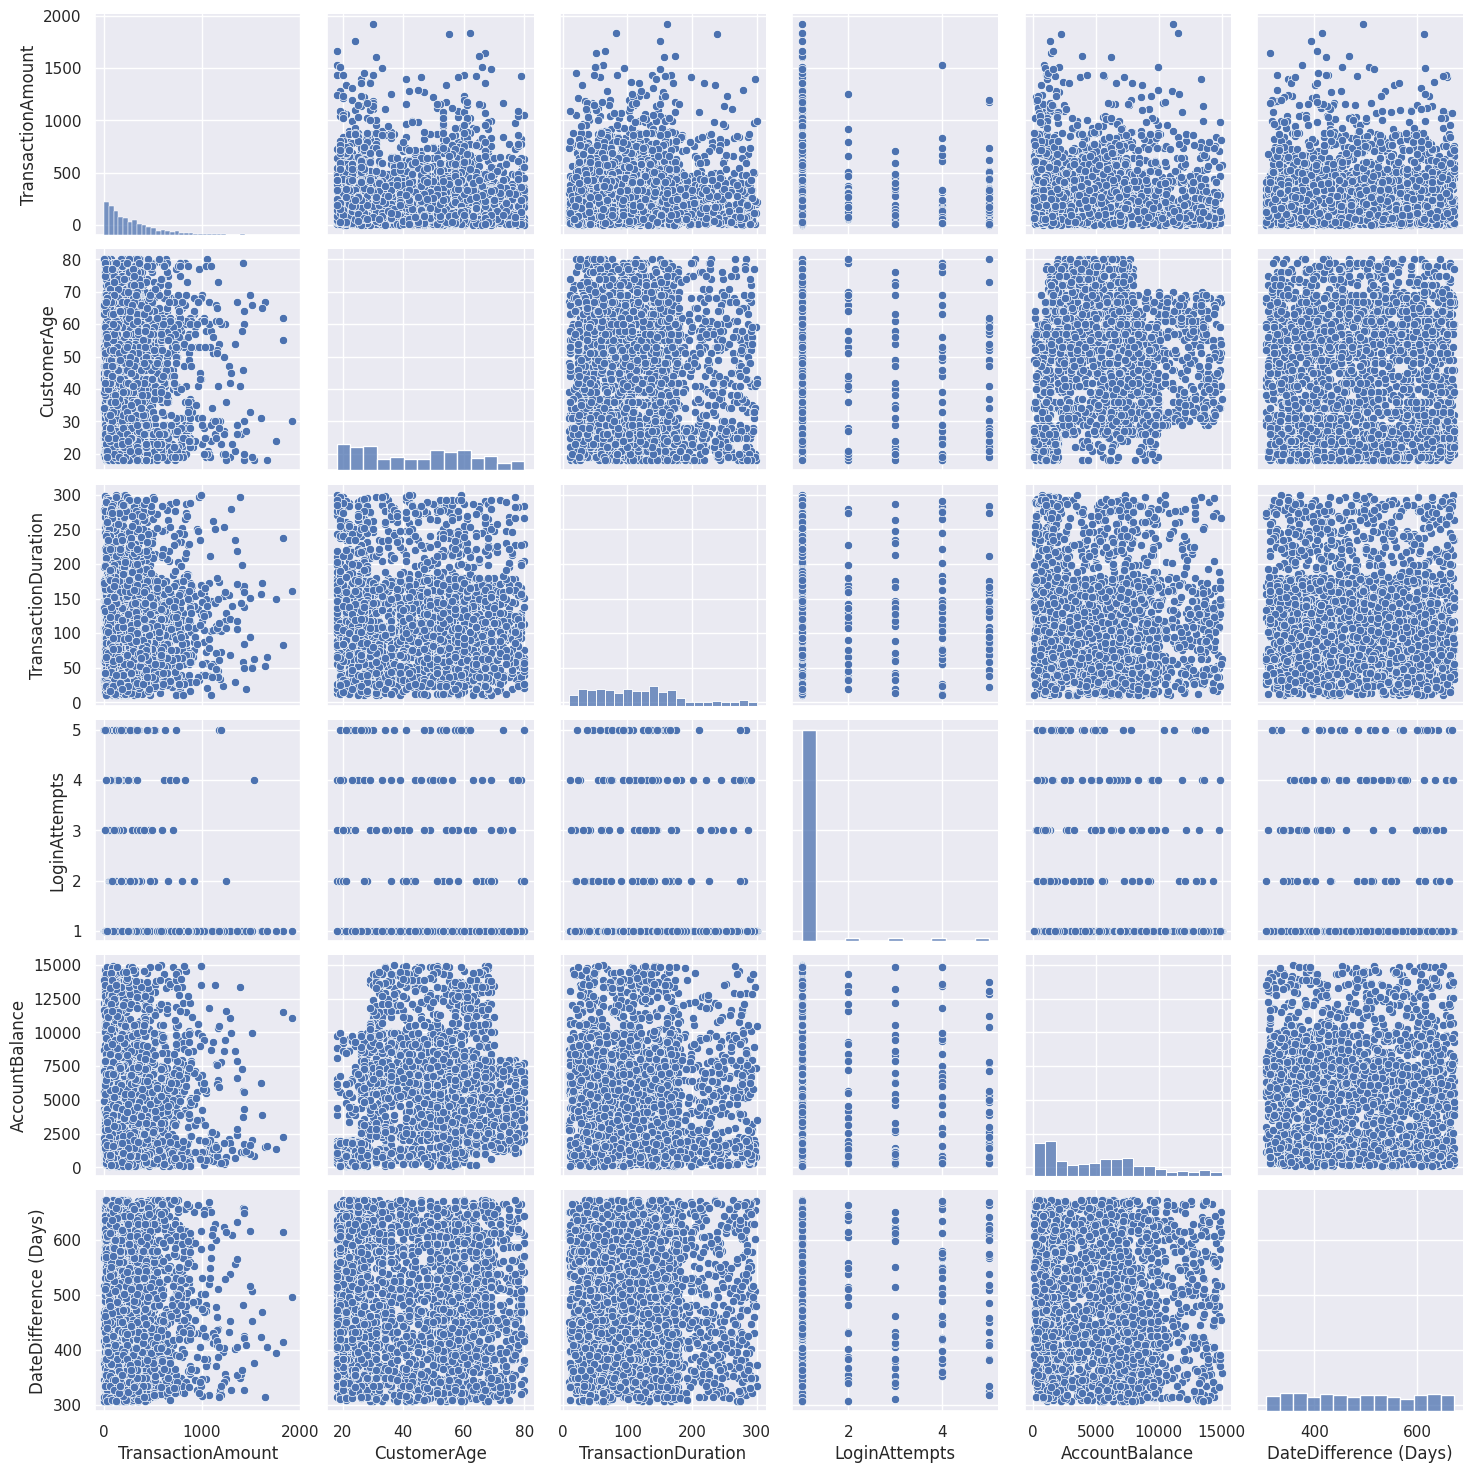

In [315]:
# Create scatter plots to visualize relationships between pairs of variables
sns.pairplot(data[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'DateDifference (Days)']])
plt.show()

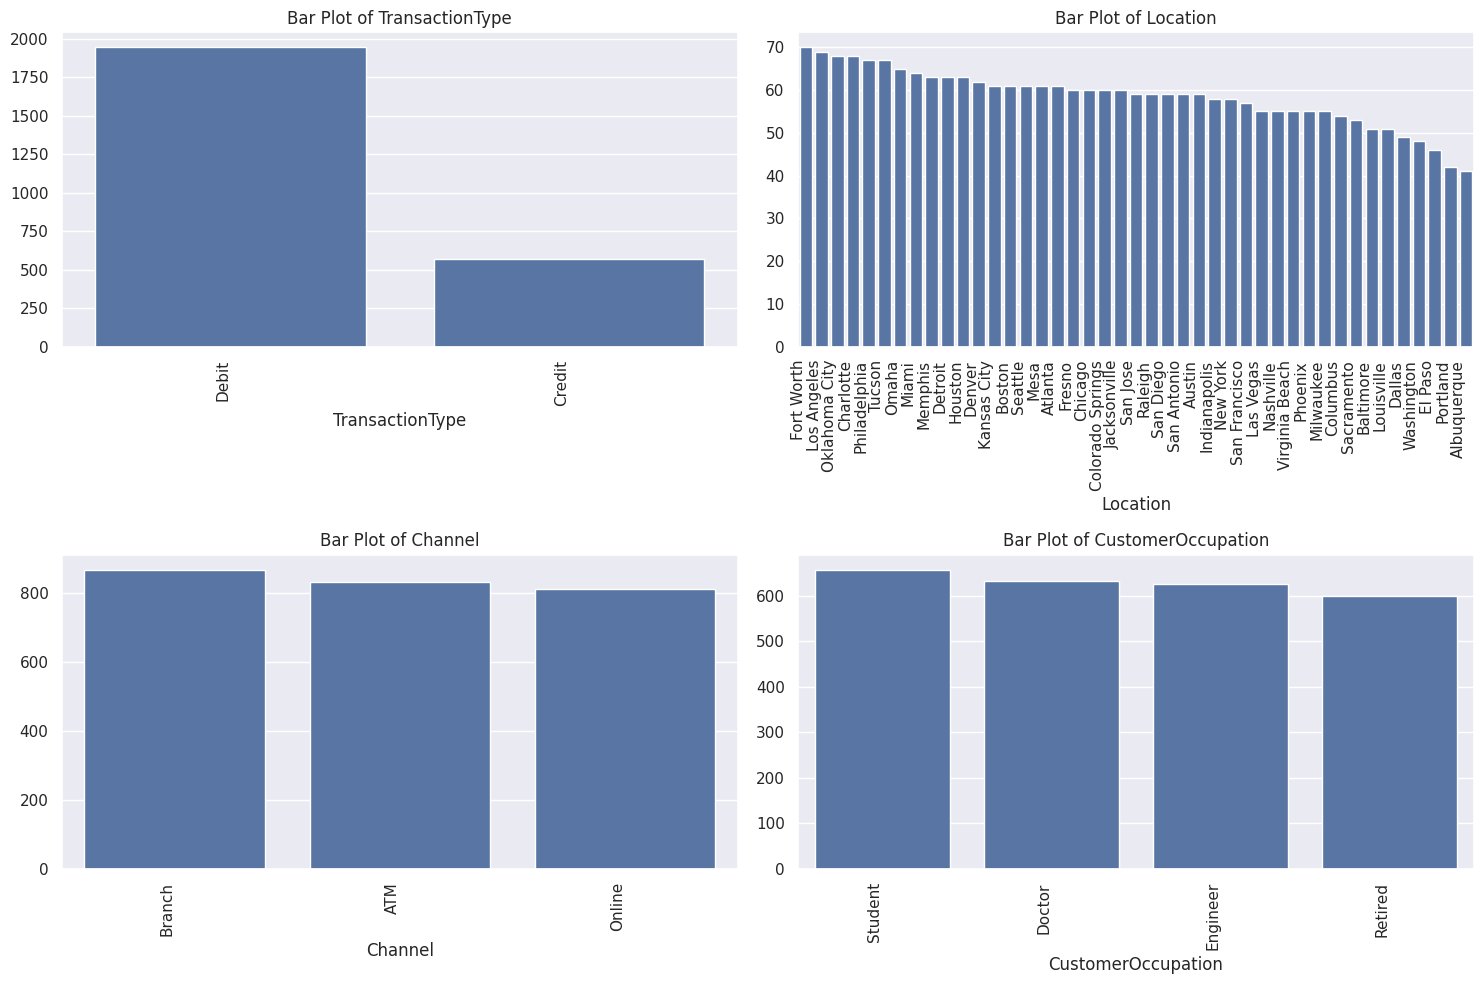

In [316]:
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(categorical_cols):
  plt.subplot(2, 2, i + 1)  # Create subplots for each column
  value_counts = data[col].value_counts().sort_values(ascending=False)
  sns.barplot(x=value_counts.index, y=value_counts.values)
  plt.title(f'Bar Plot of {col}')
  plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
  plt.tight_layout()

plt.show()

Dari visualisasi bar plot terlihat bahwa hampir semua fitur kategorikal memiliki jumlah yang cukup seimbang, kecuali fitur *TransactionType*, dimana pengguna Debit jauh lebih banyak ketimbang Credit

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [317]:
data = data.drop(columns=['TransactionDate', 'PreviousTransactionDate'])

Hapus fitur yang berkaitan dengan waktu

TransactionAmount        113
CustomerAge                0
TransactionDuration        0
LoginAttempts            122
AccountBalance             0
DateDifference (Days)      0
dtype: int64


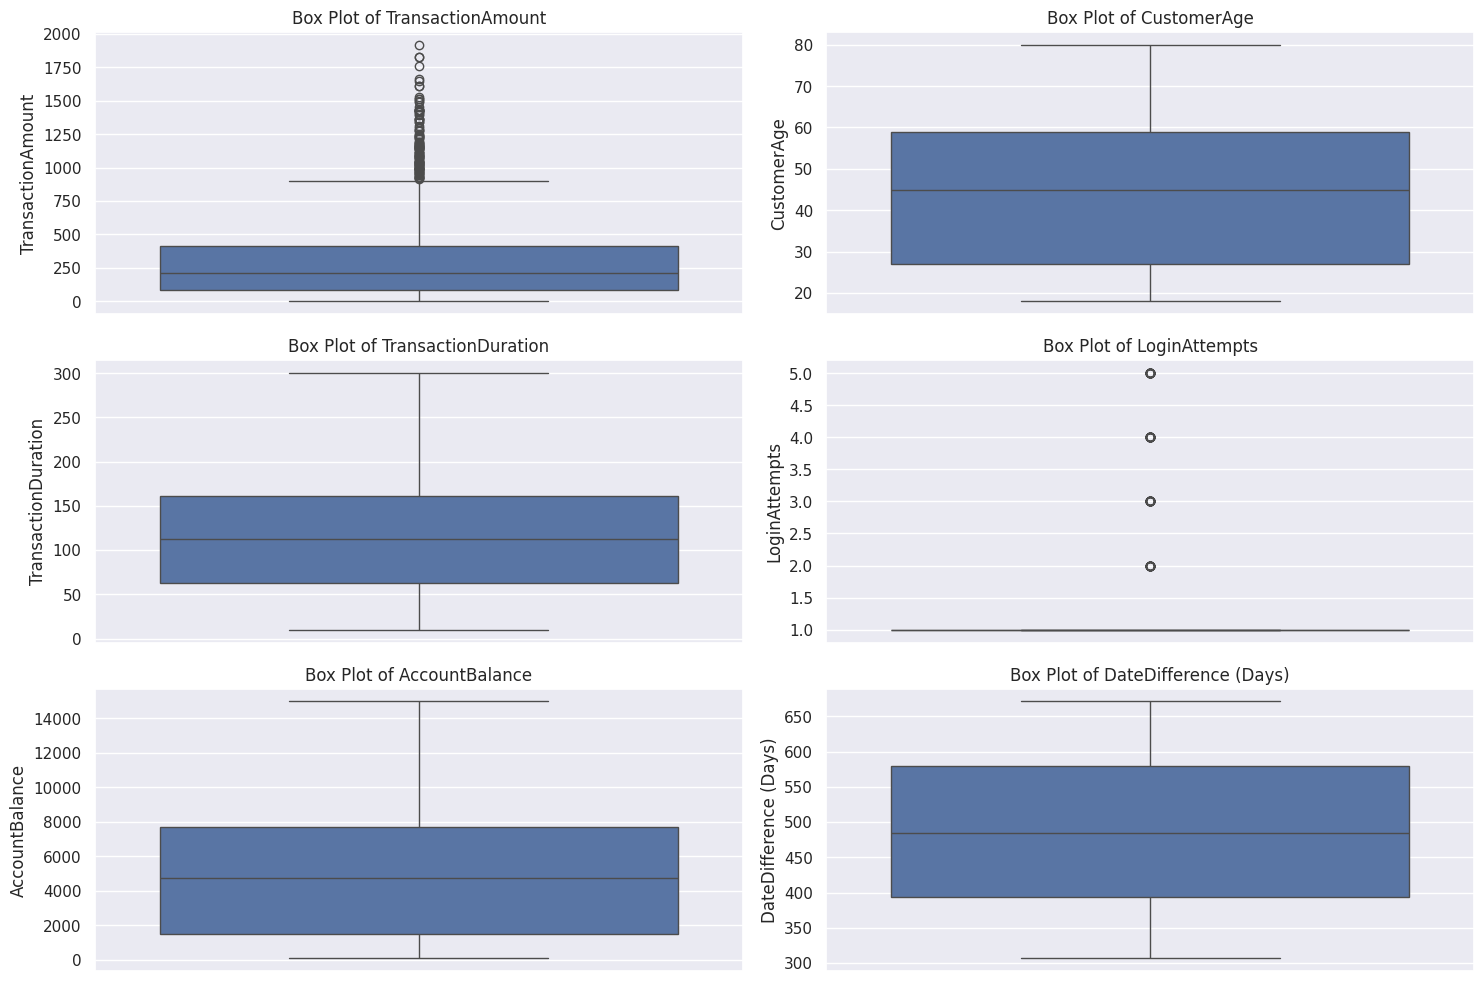

In [318]:
# Identify numerical features for outlier detection
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'DateDifference (Days)']

# Calculate the IQR for each numerical feature
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound))
print(outliers.sum())

# Optionally, visualize the outliers using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)  # Adjust subplot layout as needed
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

Terdapat beberapa outlier di fitur jumlah transaksi dan perobaan masuk. Karena hal tersebut lumrah di dunia nyata, maka data tersebut dibiarkan

In [319]:
for col in numerical_cols:
  data[col] = np.log1p(data[col])

Sebagai gantinya, maka dilakukan transformasi log dengan tujuan untuk meminimalisir efek dari outlier pada dataset

In [320]:
def label_encode(df, categorical_cols):
    # Create a copy of the DataFrame to avoid modifying the original data
    df_encoded = df.copy()

    # Initialize LabelEncoder
    label_encoders = {}

    for col in categorical_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

    return df_encoded, label_encoders

# Use the function to perform Label Encoding
encoded_data, encoders = label_encode(data, categorical_cols)
encoded_data

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DateDifference (Days)
0,2.714032,1,36,0,4.262680,0,4.406719,0.693147,8.539583,6.350886
1,5.932882,1,15,0,4.234107,0,4.955827,0.693147,9.529515,6.206576
2,4.846468,1,23,2,2.995732,3,4.043051,0.693147,7.024071,6.180017
3,5.223055,1,33,2,3.295837,3,3.258097,0.693147,9.056030,6.308098
4,2.670694,0,1,2,3.295837,3,5.293305,0.693147,8.913335,5.953243
...,...,...,...,...,...,...,...,...,...,...
2507,6.753683,0,7,1,3.526361,0,4.700480,0.693147,9.448711,6.324359
2508,5.531570,1,40,1,3.891820,0,5.181784,0.693147,5.544200,6.385194
2509,3.388787,1,36,1,4.043051,2,4.990433,0.693147,8.126787,6.089045
2510,5.230948,1,10,2,3.178054,3,2.995732,0.693147,7.483194,6.428105


Melakukan encoding pada data kategorikal untuk mengkonversi data menjadi nilai numerik agar model dapat membaca. Digunakan label encoding supaya tidak membiarkan jumlah fitur menjadi terlalu banyak sehingga performa model tidak berkurang.

In [321]:
# Create a StandardScaler object
scaler = StandardScaler()

# Simpan nama kolom sebelum transformasi
columns = encoded_data.columns

# Fit dan transform data, lalu ubah kembali ke DataFrame
encoded_data = pd.DataFrame(scaler.fit_transform(encoded_data), columns=columns)
encoded_data

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DateDifference (Days)
0,-1.994061,0.540538,1.221714,-1.225361,1.245125,-1.337394,-0.251275,-0.214735,0.401244,0.827072
1,0.646895,0.540538,-0.492416,-1.225361,1.177373,-1.337394,0.525301,-0.214735,1.303267,0.183649
2,-0.244470,0.540538,0.160586,1.247014,-1.759013,1.319064,-0.765592,-0.214735,-0.979685,0.065231
3,0.064507,0.540538,0.976839,1.247014,-1.047417,1.319064,-1.875714,-0.214735,0.871829,0.636300
4,-2.029619,-1.850010,-1.635170,1.247014,-1.047417,1.319064,1.002578,-0.214735,0.741806,-0.945866
...,...,...,...,...,...,...,...,...,...,...
2507,1.320335,-1.850010,-1.145418,0.010826,-0.500808,-1.337394,0.164177,-0.214735,1.229639,0.708799
2508,0.317633,0.540538,1.548215,0.010826,0.365757,-1.337394,0.844859,-0.214735,-2.328137,0.980042
2509,-1.440448,0.540538,1.221714,0.010826,0.724350,0.433578,0.574241,-0.214735,0.025107,-0.340378
2510,0.070983,0.540538,-0.900542,1.247014,-1.326699,1.319064,-2.246763,-0.214735,-0.561333,1.171365


Melakukan standarisasi supaya rentang pada data numerik tidak berjarak jauh.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

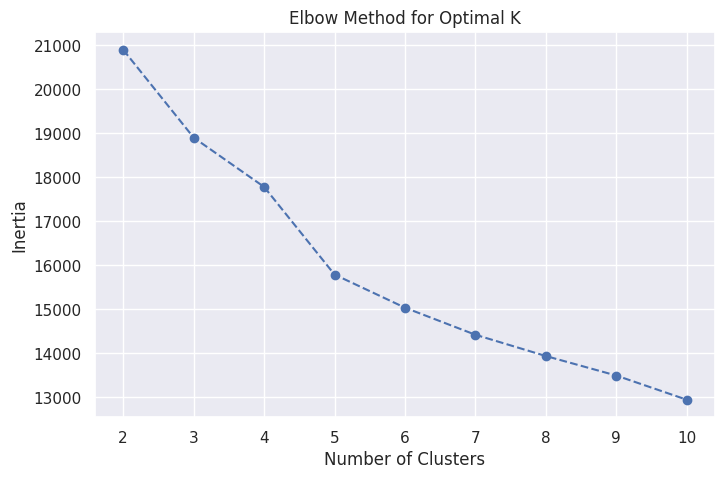

In [322]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
K_range = range(2, 11)

for k in K_range:
    # Apply K-Means clustering with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(encoded_data)
    inertia.append(kmeans.inertia_)

# Visualize the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Elbow method untuk menentukan jumlah cluster pada K Means. Tidak begitu terlihat adanya cekungan yang signifikan pada grafik sehingga cukup memakai 2 cluster.

In [323]:
# Dimensionality reduction with PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_data)

# Add PCA results as new columns in the DataFrame
encoded_data['PCA1'] = pca_result[:, 0]
encoded_data['PCA2'] = pca_result[:, 1]

# Display the first few rows of the PCA-transformed data
encoded_data[['PCA1', 'PCA2']].head()

,PCA1,PCA2
0,1.760546,1.466747
1,2.133159,1.287962
2,-2.309280,-0.480428
3,-0.864957,-0.433772
4,-0.680666,-2.028804


Reduksi dimensi encoded_data menggunakan PCA menjadi 2 fitur untuk memudahkan visualisasi.

In [324]:
# Perform KMeans clustering
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(encoded_data)
encoded_data['KMeans_Cluster'] = kmeans.labels_

Membuat model K Means dengan 2 buah cluster.

In [325]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2.8, min_samples=15)
dbscan.fit(encoded_data)
encoded_data['DBSCAN_Cluster'] = dbscan.labels_

Membuat model DBSCAN sebagai model pembanding.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [326]:
# Calculate Silhouette Score for KMeans
sil_score = silhouette_score(encoded_data.drop(columns=['PCA1', 'PCA2']), encoded_data['KMeans_Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: 0.2085


In [327]:
# Calculate Silhouette Score for DBSCAN
dbscan_silhouette = silhouette_score(encoded_data.drop(columns=['PCA1', 'PCA2', 'KMeans_Cluster']), encoded_data['DBSCAN_Cluster'])
print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.4f}')

DBSCAN Silhouette Score: 0.1710


Model K Means terlihat lebih baik pada data ini dilihat dari silhouette score dibanding model DBSCAN.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [328]:
encoded_data = encoded_data.drop(columns=['PCA1', 'PCA2', 'DBSCAN_Cluster'])

In [329]:
# Assume 'encoded_data' is a DataFrame with the target variable 'KMeans_Cluster'
X = encoded_data.drop('KMeans_Cluster', axis=1)
y = encoded_data['KMeans_Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Filter only features with importance > 0.05
filtered_features = feature_importance_df[feature_importance_df['Importance'] > 0.05]

# Display features that meet the threshold
print("Features that meet the threshold (importance > 0.05):")
print(filtered_features.to_string(index=False))

Features that meet the threshold (importance > 0.05):
           Feature  Importance
       CustomerAge    0.400852
CustomerOccupation    0.406306
    AccountBalance    0.165523


Dari seleksi fitur menggunakan metode wrapped dengan model random forest dipilih 3 fitur dengan importance di atas 0.05.

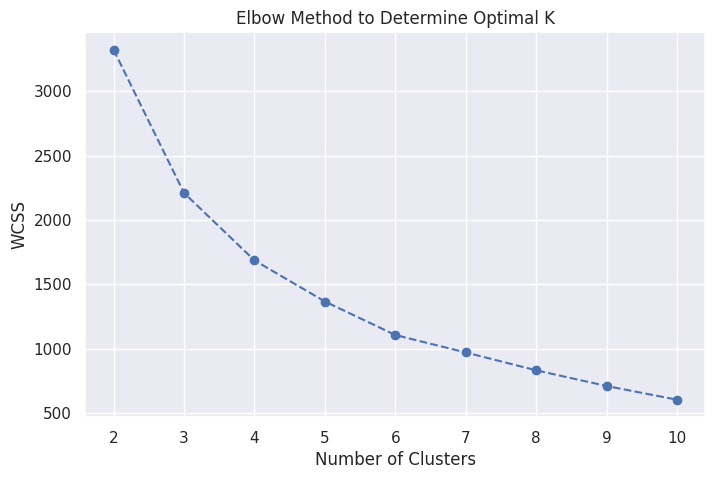

In [330]:
# Use only the selected features
X_selected = X[filtered_features['Feature']]

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(2, 11):  # Start from 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_selected)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

Kembali lagi tidak terdapat cekungan yang signifikan pada grafik sehingga cukup memakai 2 buah cluster.

In [331]:
# Choose the number of clusters based on the Elbow Method
k_optimal = 2
kmeans_model = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
X_selected['KMeans_Cluster'] = kmeans_model.fit_predict(X_selected)

<ipython-input-331-c6d36ad8e271>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['KMeans_Cluster'] = kmeans_model.fit_predict(X_selected)


In [332]:
# Compute the silhouette score
silhouette_avg = silhouette_score(X_selected.drop(columns=['KMeans_Cluster']), X_selected['KMeans_Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5419


Terlihat nilai silhouette score yang lebih besar pada fitur yang sudah diseleksi dibandingkan pada data dengan fitur lengkap.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

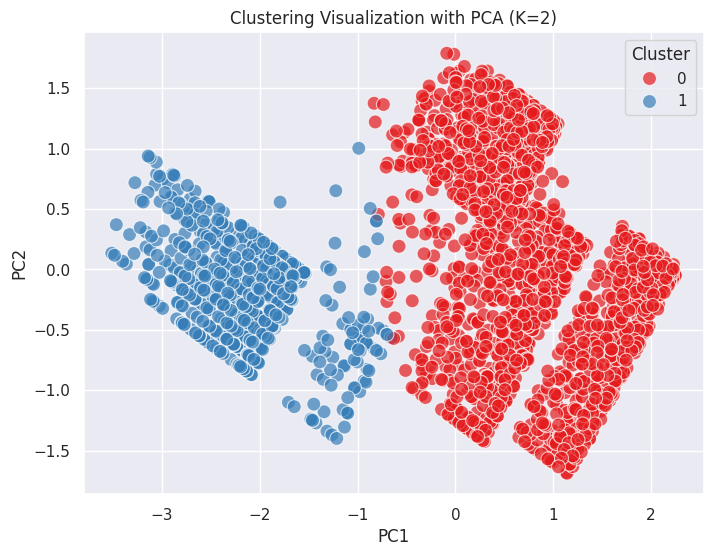

In [333]:
# Dimensionality reduction with PCA for visualization
pca = PCA(n_components=2)  # 2D PCA
X_pca = pca.fit_transform(X_selected.drop(columns=['KMeans_Cluster']))

# Create a DataFrame for visualization
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Cluster'] = X_selected['KMeans_Cluster']

# Plot clustering results
plt.figure(figsize=(8,6))
sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', alpha=0.7, s=100)
plt.title(f'Clustering Visualization with PCA (K={k_optimal})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [334]:
inverse_data = encoded_data.copy()
inverse_data = inverse_data.drop(columns='KMeans_Cluster')

In [335]:
# Inverse StandardScaler
inverse_data = pd.DataFrame(scaler.inverse_transform(inverse_data), columns=columns)

# Inverse Log Transform on numerical columns
for col in numerical_cols:
    inverse_data[col] = np.expm1(inverse_data[col])

# Ensure categorical columns are in integer form before inverse label encoding
for col in categorical_cols:
    inverse_data[col] = inverse_data[col].round().astype(int)
    le = encoders[col]
    inverse_data[col] = le.inverse_transform(inverse_data[col])

In [336]:
inverse_data['Cluster'] = kmeans_model.labels_
inverse_data.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DateDifference (Days),Cluster
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,572.0,0
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,495.0,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,482.0,1
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,548.0,1
4,13.45,Credit,Atlanta,Online,26.0,Student,198.0,1.0,7429.40,384.0,1


Menambahkan label hasil clustering K Means pasca seleksi fitur ke data awal.

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [337]:
# Group data by cluster and calculate the mean of numerical columns
cluster_summary = inverse_data.groupby('Cluster')[numerical_cols].agg(['max', 'mean', 'min']).round(1)

Gruping data numerik berdasarkan agregasi mean, max, dan min pada masing-masing cluster.

In [338]:
# Group data by cluster and calculate the mode of categorical columns
cluster_summary_categorical = inverse_data.groupby('Cluster')[['TransactionType', 'Location', 'Channel', 'CustomerOccupation']].agg(lambda x: x.mode()[0] if not x.mode().empty else 'None')
cluster_summary_categorical

,TransactionType,Location,Channel,CustomerOccupation
Cluster,,,,
0,Debit,Tucson,Branch,Doctor
1,Debit,Los Angeles,Branch,Student


Gruping data kategorik berdasarkan agregasi modus atau kategori terbanyak pada masing-masing cluster.

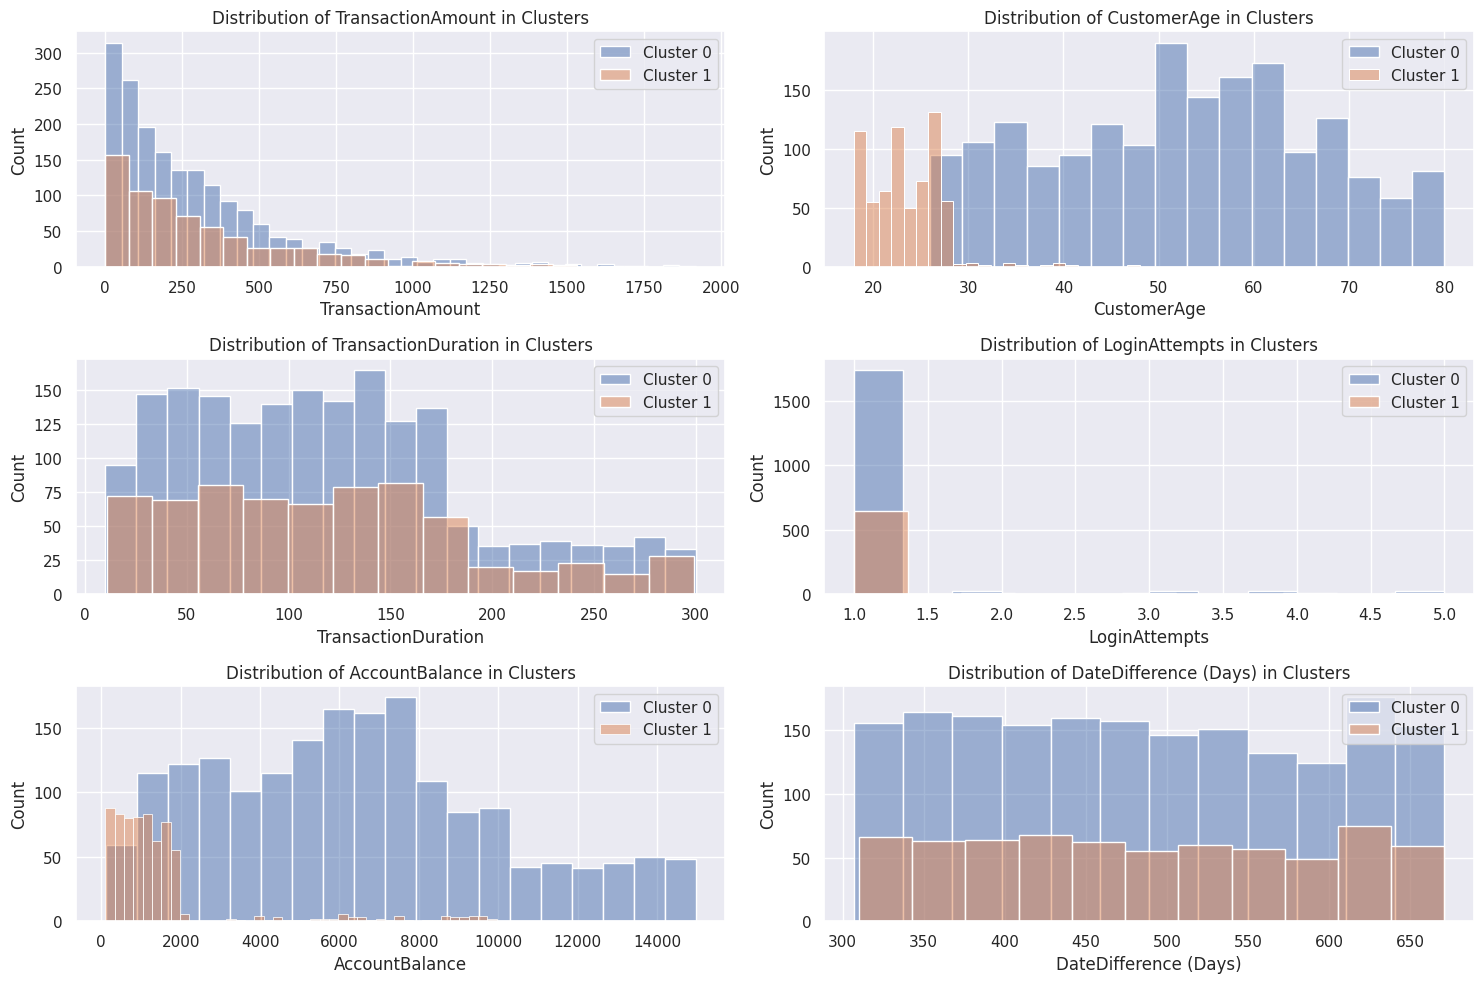

In [339]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_cols):
  plt.subplot(3, 2, i + 1)
  for cluster_label in inverse_data['Cluster'].unique():
    cluster_data = inverse_data[inverse_data['Cluster'] == cluster_label]
    sns.histplot(cluster_data[feature], label=f"Cluster {cluster_label}", kde=False, alpha=0.5)
  plt.title(f"Distribution of {feature} in Clusters")
  plt.legend()
plt.tight_layout()
plt.show()

* Cluster 0 berusia lebih matang, sedangkan Cluster 1 mayoritas lebih muda.
* Cluster 0 memiliki saldo rata-rata lebih tinggi, Cluster 1 lebih rendah.
* Sisanya semua fitur terlihat sama dan hanya berbeda dari segi jumlahnya saja karena cluster 0 lebih banyak dari cluster 1.

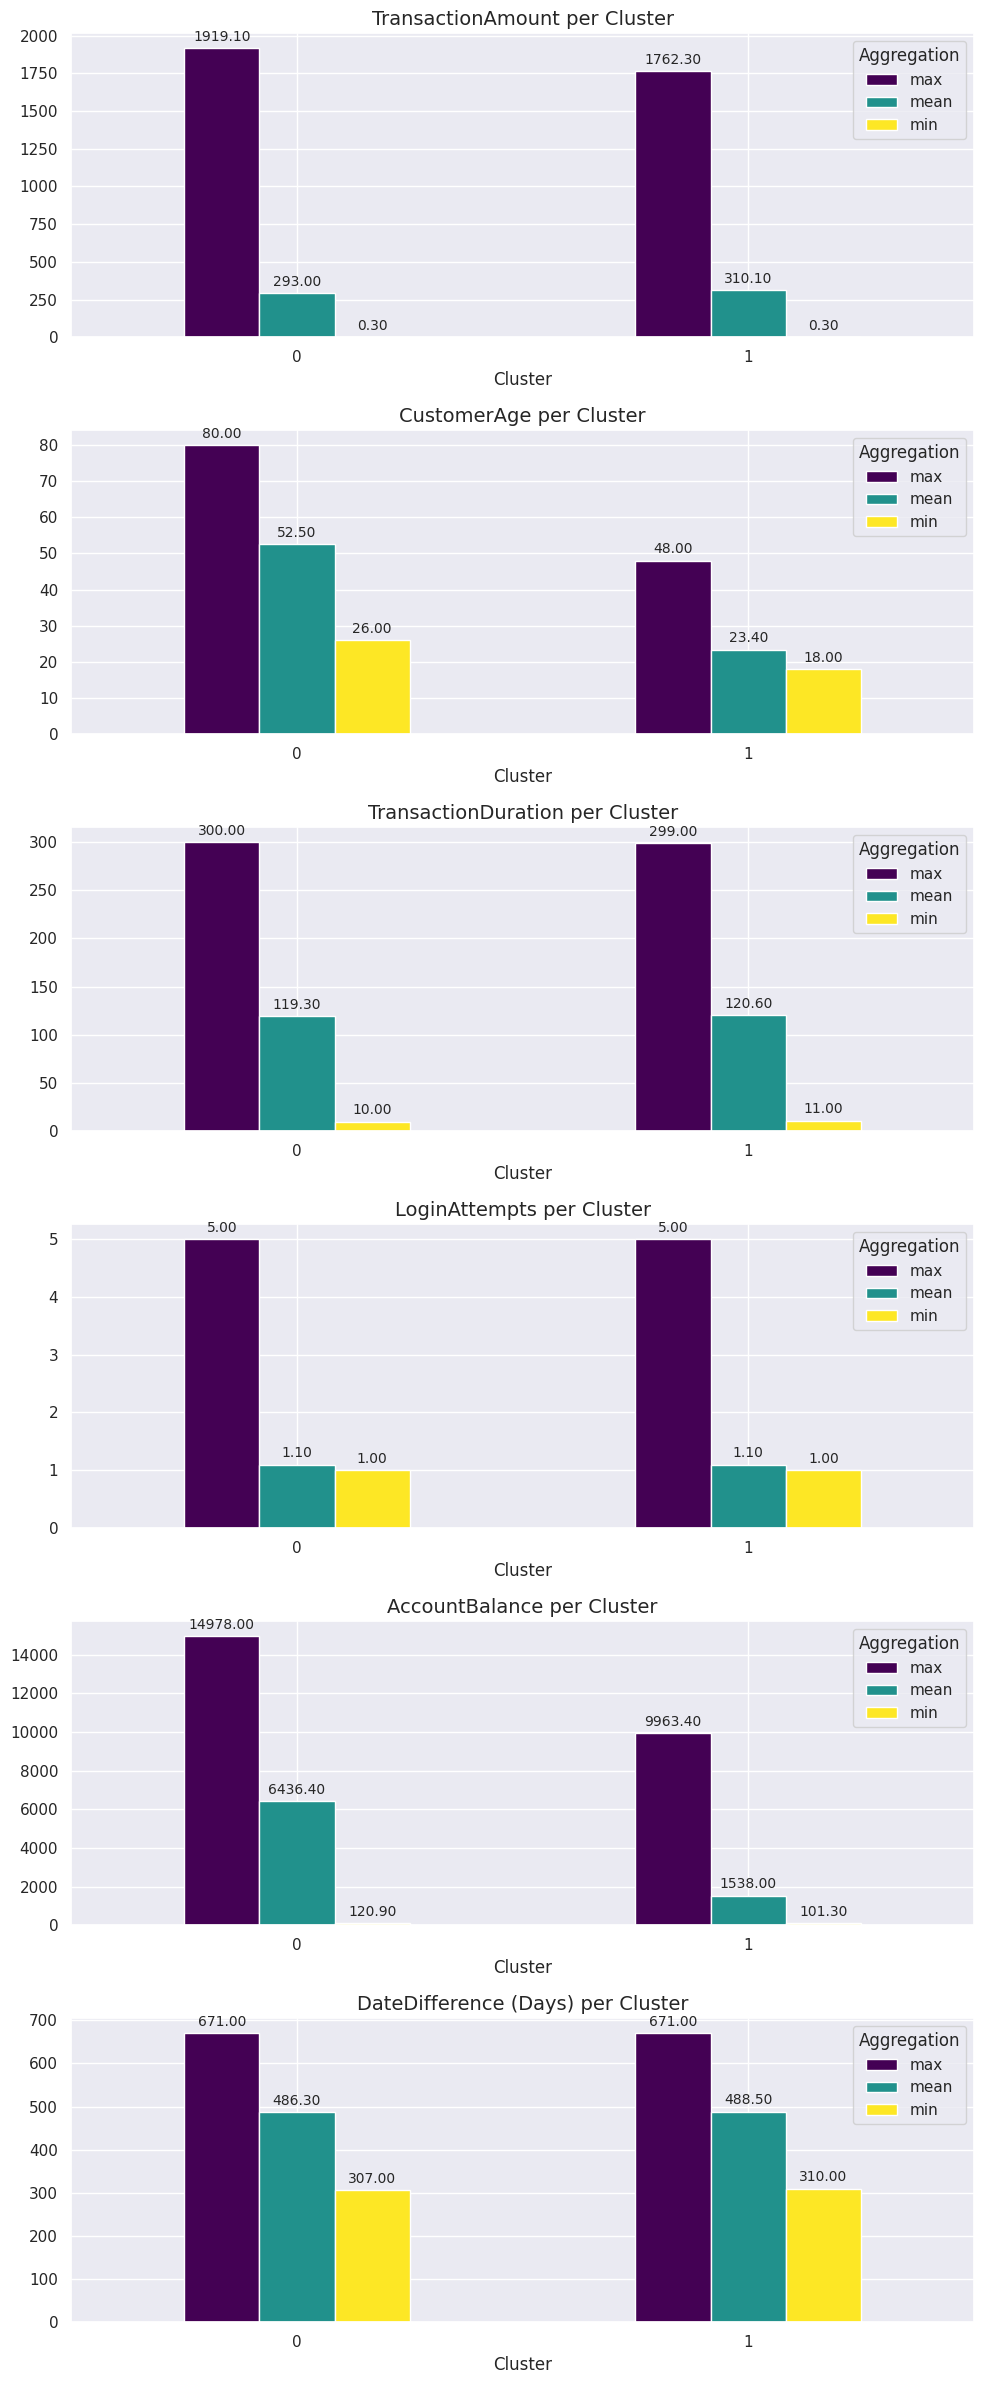

In [340]:
sns.set_theme(style="darkgrid")

# Mapping cluster names
cluster_names = {0: "0", 1: "1", 2: "2", 3: "3"}

# Create figure and axes based on the number of features
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(10, 4 * len(numerical_cols)))

# Loop through each numerical column
for idx, col in enumerate(numerical_cols):
    ax = axes[idx] if len(numerical_cols) > 1 else axes

    # Plot data
    bars = cluster_summary[col].plot(kind='bar', ax=ax, colormap='viridis')

    # Add labels on top of each bar
    for container in bars.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=10, padding=3)

    ax.set_title(f'{col} per Cluster', fontsize=14)
    ax.legend(title='Aggregation')

    # Rename clusters on the x-axis
    ax.set_xticklabels([cluster_names.get(idx, f"Cluster {idx}") for idx in cluster_summary.index], rotation=0)

plt.tight_layout()
plt.show()

Tulis hasil interpretasinya di sini.
##1. Cluster 0:
- **Jumlah Transaksi ($):**

 - Max : 1919.10

 - Mean : 310.10

 - Min : 0.30

- **Saldo Akun ($) :**

 - Max : 14,978.00

 - Mean : 6,436.40

 - Min : 120.90

- **Umur Customer :**

 - Max : 80

 - Mean : 52

 - Min : 26
- **Analisis:** Cluster ini berisi nasabah dengan jumlah transaksi aktif, saldo menengah-tinggi, dan usia rata-rata paruh baya. Transaksi dominan adalah debit, sebagian besar berprofesi sebagai dokter, dan lokasi terpusat di Tucson. Karakteristik ini menunjukkan pendapatan stabil dan daya beli moderat-tinggi, sehingga bank dapat menawarkan produk keuangan premium serta layanan khusus untuk memenuhi kebutuhan finansial para nasabah profesional di cluster ini.

##2. Cluster 1:
- **Jumlah Transaksi ($):**

 - Max : 1762.30

 - Mean : 293.00

 - Min : 0.30

- **Saldo Akun ($) :**

 - Max : 9,963.40

 - Mean : 1,538.00

 - Min : 101.20

- **Umur Customer :**

 - Max : 48

 - Mean : 23

 - Min : 18
- **Analisis:** Cluster ini diisi nasabah berusia muda dengan jumlah transaksi moderat dan saldo akun rendah-menengah. Transaksi dominan adalah debit, berlokasi di Los Angeles, terdaftar pada branch tertentu, serta berstatus mahasiswa. Meski pendapatan tahunan tergolong menengah, pola pengeluaran cukup tinggi. Bank dapat menawarkan edukasi keuangan, tabungan jangka panjang, dan promosi yang sesuai dengan gaya hidup generasi muda untuk meningkatkan loyalitas serta pertumbuhan finansial nasabah di segmen ini.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [341]:
encoded_data.to_csv('cluster.csv', index=False)